In [0]:
from vega_datasets import data

In [0]:
movies_data = data.movies()

In [4]:
movies_data.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

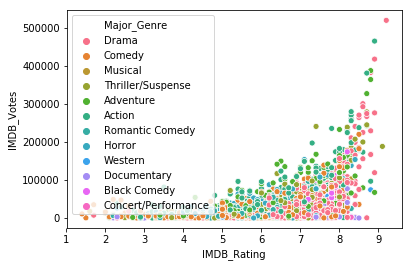

In [6]:
sns.scatterplot(y='IMDB_Votes', x='IMDB_Rating', hue='Major_Genre', data=movies_data)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

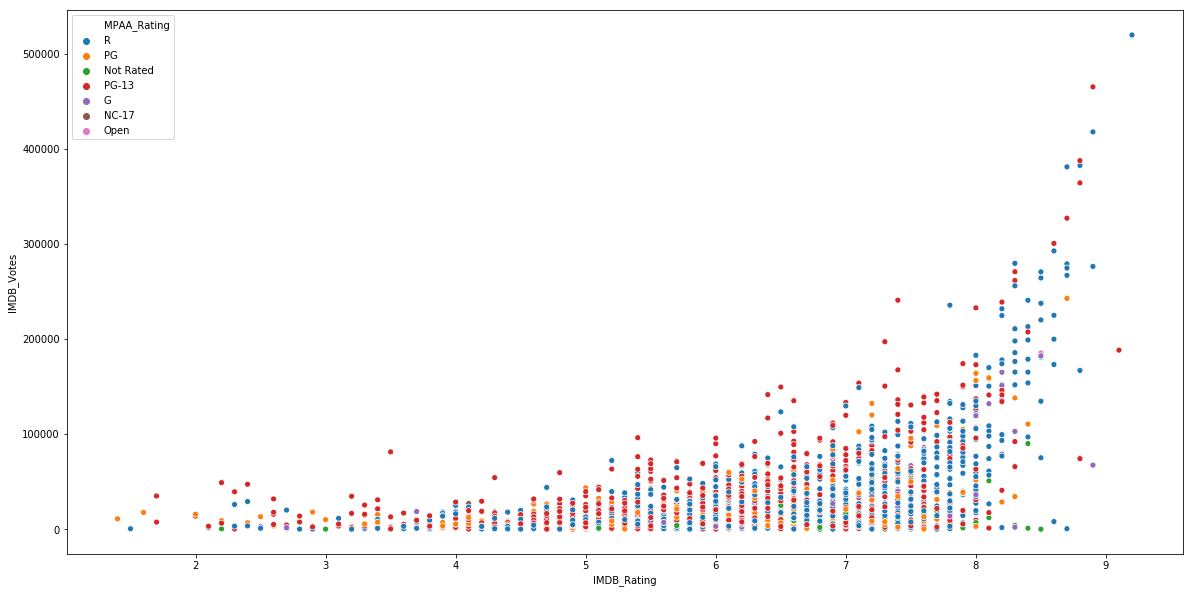

In [7]:
sns.scatterplot(y='IMDB_Votes', x='IMDB_Rating', hue='MPAA_Rating', data=movies_data)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

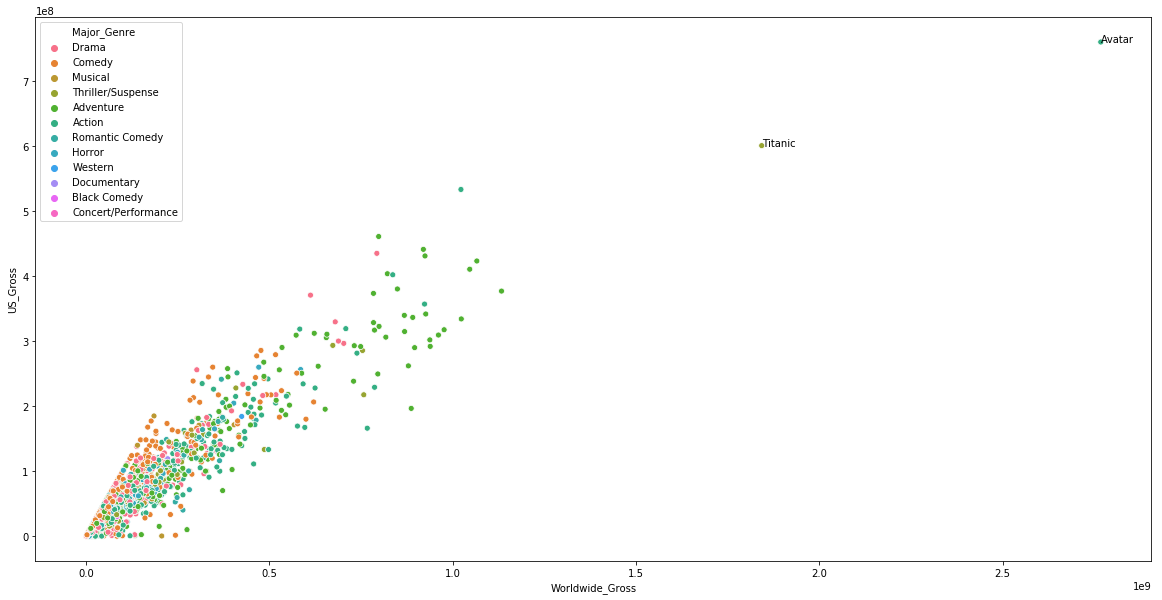

In [8]:
sns.scatterplot(x='Worldwide_Gross', y='US_Gross', hue='Major_Genre', data=movies_data)

for i, movie in enumerate(movies_data.Title):
    if movies_data.Worldwide_Gross[i] > 1500000000 and movies_data.US_Gross[i] > 500000000:
        plt.annotate(movie, (movies_data.Worldwide_Gross[i], movies_data.US_Gross[i]))


plt.rcParams["figure.figsize"] = (10,10)
plt.show()

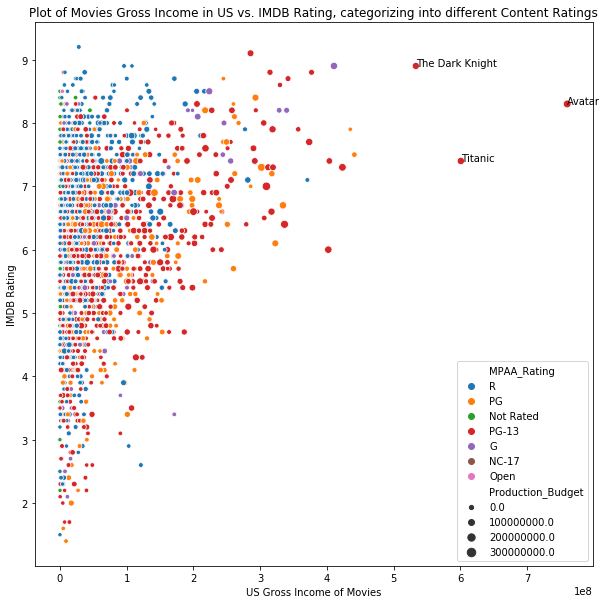

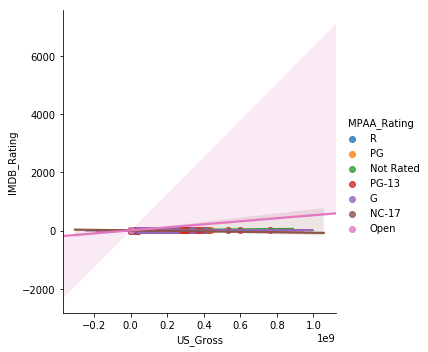

In [9]:
sns.scatterplot(x='US_Gross', y='IMDB_Rating', hue='MPAA_Rating', size='Production_Budget', data=movies_data)

for i, movie in enumerate(movies_data.Title):
    if movies_data.US_Gross[i] > 500000000 and movies_data.IMDB_Rating[i] > 6.5:
        plt.annotate(movie, (movies_data.US_Gross[i], movies_data.IMDB_Rating[i]))

plt.rcParams["figure.figsize"] = (25,10)
plt.xlabel('US Gross Income of Movies')
plt.ylabel('IMDB Rating')
plt.title('Plot of Movies Gross Income in US vs. IMDB Rating, categorizing into different Content Ratings')
plt.show()

import seaborn as sns
sns.lmplot(x='US_Gross',y='IMDB_Rating',hue='MPAA_Rating',data=movies_data)

#Log Scale



In [10]:
import numpy as np
movies_data['Production_Budget_Log']=np.log(movies_data.Production_Budget)
movies_data.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross,Production_Budget_Log
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0,15.894952
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0,12.611538
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0,12.429216
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0,12.611538
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0,13.815511


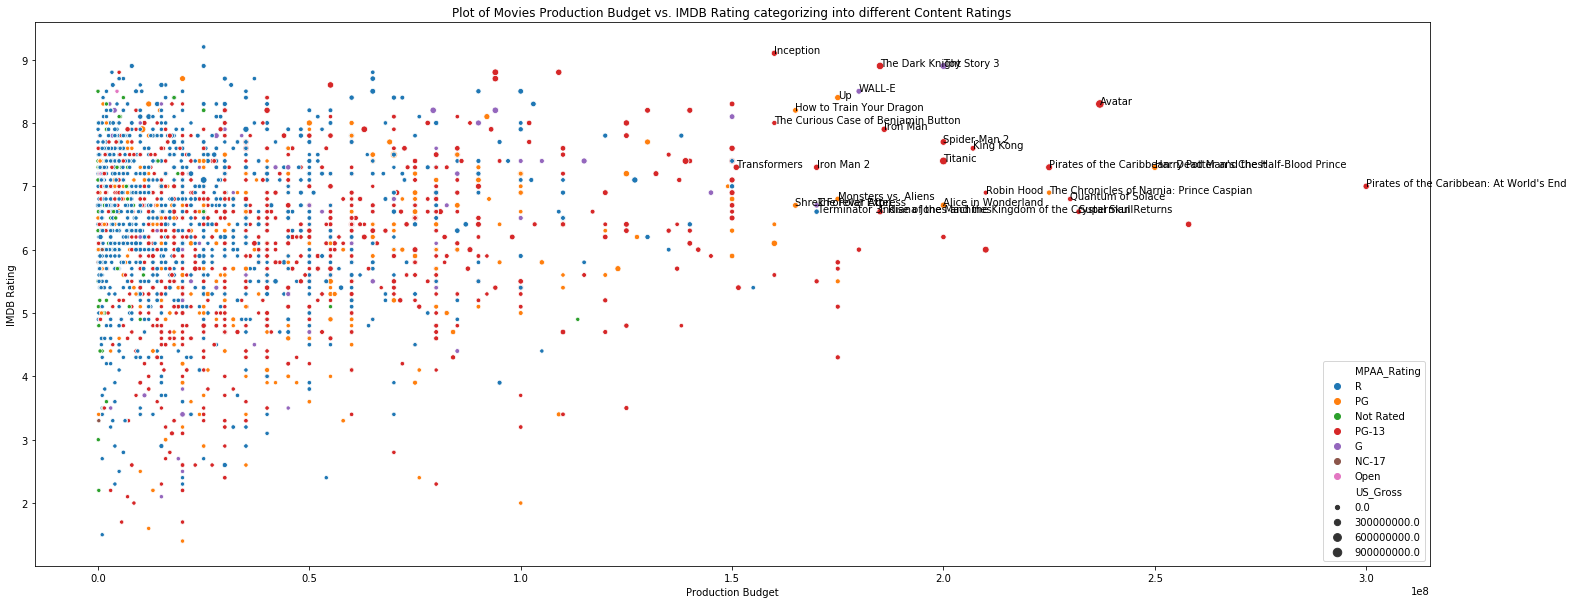

In [11]:
sns.scatterplot(x='Production_Budget', y='IMDB_Rating', hue='MPAA_Rating', size='US_Gross', data=movies_data)

for i, movie in enumerate(movies_data.Title):
    if movies_data.Production_Budget[i] > 150000000 and movies_data.IMDB_Rating[i] > 6.5:
        plt.annotate(movie, (movies_data.Production_Budget[i], movies_data.IMDB_Rating[i]))

plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Production Budget')
plt.ylabel('IMDB Rating')
plt.title('Plot of Movies Production Budget vs. IMDB Rating categorizing into different Content Ratings')
plt.show()

#DatetimeIndex

In [12]:
import pandas as pd
pd.DatetimeIndex(movies_data.Release_Date).year

Int64Index([1998, 1998, 1998, 1998, 1998, 1999, 1999, 1999, 1986, 2046,
            ...
            2009, 2005, 1998, 2001, 2009, 2008, 2007, 2006, 2005, 1998],
           dtype='int64', name='Release_Date', length=3201)

In [13]:
movies_data['year'] = pd.DatetimeIndex(movies_data.Release_Date).year
movies_data.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross,Production_Budget_Log,year
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0,15.894952,1998
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0,12.611538,1998
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0,12.429216,1998
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0,12.611538,1998
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0,13.815511,1998


In [14]:
import pandas as pd
pd.DatetimeIndex(movies_data.Release_Date).month

Int64Index([ 6,  8,  8,  9, 10,  1,  4,  4,  7, 12,
            ...
            12, 11,  1,  9, 10, 10,  3,  8, 10,  7],
           dtype='int64', name='Release_Date', length=3201)

In [15]:
import pandas as pd
pd.DatetimeIndex(movies_data.Release_Date).day

Int64Index([12,  7, 28, 11,  9, 15,  4,  9,  1, 31,
            ...
            18, 11, 30, 28,  2, 31,  2, 11, 28, 17],
           dtype='int64', name='Release_Date', length=3201)

In [16]:
movies_data[movies_data.year > 2019]

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross,Production_Budget_Log,year
9,None,None,None,7.0,2906.0,None,None,6000000.0,Dec 31 2046,86.0,NaN,None,Duel in the Sun,NaN,20400000.0,20400000.0,15.607270,2046
15,None,None,None,NaN,NaN,None,None,100000.0,Sep 17 2020,NaN,NaN,None,Over the Hill to the Poorhouse,NaN,3000000.0,3000000.0,11.512925,2020
16,None,None,None,7.0,451.0,None,None,5200000.0,Aug 01 2044,NaN,NaN,None,Wilson,NaN,2000000.0,2000000.0,15.464169,2044
33,None,None,Warner Bros.,7.7,4263.0,None,Musical,439000.0,Mar 09 2033,95.0,NaN,Based on Book/Short Story,42nd Street,NaN,2300000.0,2300000.0,12.992255,2033
85,None,None,MGM,8.2,58510.0,None,Adventure,3900000.0,Dec 30 2025,NaN,NaN,Based on Book/Short Story,Ben-Hur,NaN,9000000.0,9000000.0,15.176487,2025
90,None,William Wyler,RKO Radio Pictures,8.2,17338.0,None,Drama,2100000.0,Nov 21 2046,97.0,NaN,Based on Book/Short Story,The Best Years of Our Lives,NaN,23600000.0,23600000.0,14.557448,2046
102,None,King Vidor,MGM,8.4,2600.0,None,Drama,245000.0,Jan 01 2025,100.0,NaN,Based on Play,The Big Parade,NaN,11000000.0,22000000.0,12.409013,2025
174,Dramatization,Michael Curtiz,Warner Bros.,NaN,NaN,None,Action,1200000.0,Oct 20 2036,NaN,NaN,Based on Real Life Events,"Charge of the Light Brigade, The",NaN,0.0,0.0,13.997832,2036
221,Fantasy,None,RKO Radio Pictures,5.9,6791.0,None,Drama,134000.0,Nov 16 2042,91.0,NaN,Original Screenplay,Cat People,NaN,4000000.0,8000000.0,11.805595,2042
337,Multiple Creative Types,None,Walt Disney Pictures,7.8,29914.0,None,Musical,2280000.0,Nov 13 2040,98.0,NaN,Compilation,Fantasia,NaN,83320000.0,83320000.0,14.639686,2040


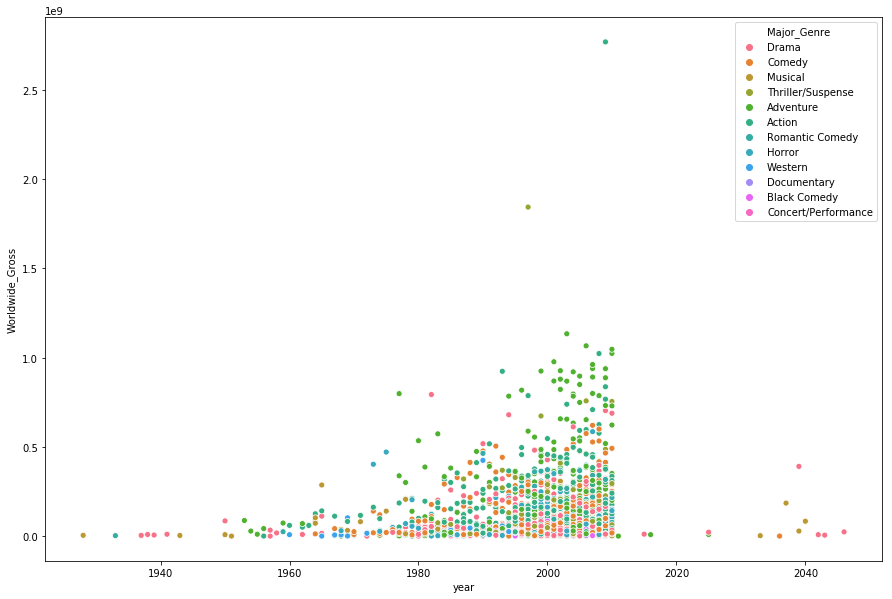

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='year', y='Worldwide_Gross', hue='Major_Genre', data=movies_data)

#Removing bad movies with year > 2019

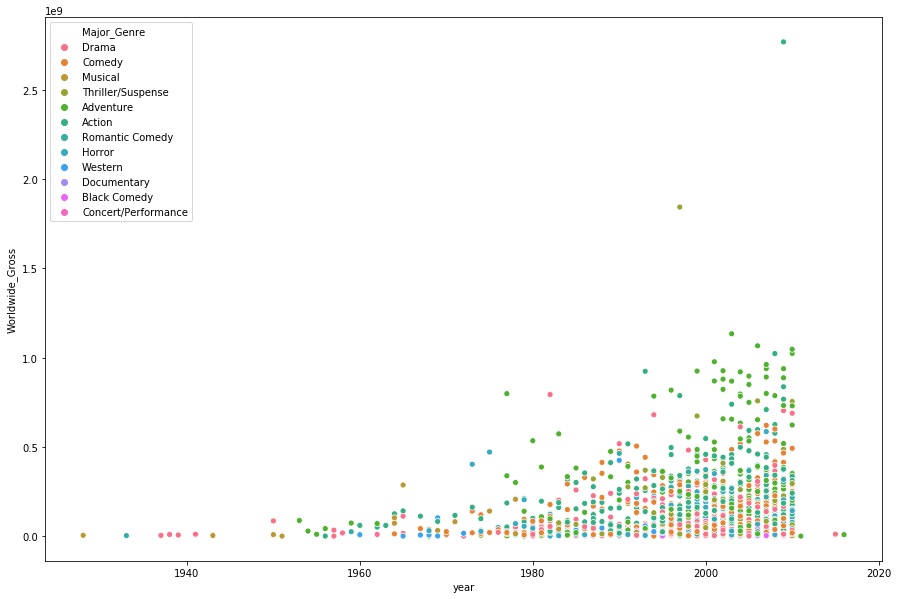

In [21]:
movies_data =  movies_data[movies_data.year <= 2019]
plt.figure(figsize=(15, 10))
sns.scatterplot(x='year', y='Worldwide_Gross', hue='Major_Genre', data=movies_data)